# LAB 6: Análisis de tráfico de red 

---

## Preámbulo

In [1]:
from scapy.all import sniff

# Capturar 25 paquetes de la red doméstica
paquetes = sniff(count=25)


In [2]:
# Tipo de la variable
print("Tipo de la variable:", type(paquetes))

# Longitud
print("Cantidad de paquetes capturados:", len(paquetes))

# Contenido completo
print("Contenido de la variable paquetes:")
print(paquetes.show())  # Muestra información estructurada


Tipo de la variable: <class 'scapy.plist.PacketList'>
Cantidad de paquetes capturados: 25
Contenido de la variable paquetes:
0000 Ether / IPv6 / TCP 2803:d100:98d0:13a:cdba:2505:81f1:1bab:53583 > 2001:4c28:3000:622:107:167:110:216:https A / Raw
0001 Ether / IP / TCP 192.168.0.6:53501 > 104.208.16.88:https PA / Raw
0002 Ether / IP / TCP 192.168.0.6:53501 > 104.208.16.88:https PA / Raw
0003 Ether / IPv6 / TCP 2001:4c28:3000:622:107:167:110:216:https > 2803:d100:98d0:13a:cdba:2505:81f1:1bab:53583 R
0004 Ether / IPv6 / UDP / DNS Qry b'mobile.events.data.microsoft.com.'
0005 Ether / IPv6 / UDP / DNS Qry b'mobile.events.data.microsoft.com.'
0006 Ether / IPv6 / UDP / DNS Ans b'mobile.events.data.trafficmanager.net.'
0007 Ether / IPv6 / UDP / DNS Ans b'mobile.events.data.trafficmanager.net.'
0008 Ether / IP / TCP 192.168.0.6:53940 > 52.168.112.67:https S
0009 Ether / IP / TCP 104.208.16.88:https > 192.168.0.6:53501 A / Padding
0010 Ether / IP / TCP 52.168.112.67:https > 192.168.0.6:53940 SA
00

In [3]:
print("Tipo de dato del primer paquete:", type(paquetes[0]))


Tipo de dato del primer paquete: <class 'scapy.layers.l2.Ether'>


In [4]:
# Mostrar los primeros 5 paquetes
print("Contenido de los primeros 5 paquetes:")
for i in range(5):
    print(f"\nPaquete #{i + 1}:")
    paquetes[i].show()

Contenido de los primeros 5 paquetes:

Paquete #1:
###[ Ethernet ]###
  dst       = 48:4e:fc:9f:fb:04
  src       = b4:0e:de:3a:c2:b2
  type      = IPv6
###[ IPv6 ]###
     version   = 6
     tc        = 0
     fl        = 1003675
     plen      = 21
     nh        = TCP
     hlim      = 64
     src       = 2803:d100:98d0:13a:cdba:2505:81f1:1bab
     dst       = 2001:4c28:3000:622:107:167:110:216
###[ TCP ]###
        sport     = 53583
        dport     = https
        seq       = 4161356308
        ack       = 2907004347
        dataofs   = 5
        reserved  = 0
        flags     = A
        window    = 514
        chksum    = 0xcb65
        urgptr    = 0
        options   = []
###[ Raw ]###
           load      = b'\x00'


Paquete #2:
###[ Ethernet ]###
  dst       = 48:4e:fc:9f:fb:04
  src       = b4:0e:de:3a:c2:b2
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 183
     id        = 46964
     flags     = DF
     frag    

## Análisis estadístico

In [5]:
from scapy.all import rdpcap

# Cargar archivo .pcap
paquetes = rdpcap("analisis_paquetes.pcap")

# Verificamos cuántos paquetes hay
print(f"Paquetes cargados: {len(paquetes)}")


Paquetes cargados: 62


In [6]:
import pandas as pd

datos = []

for pkt in paquetes:
    if pkt.haslayer("IP"):
        ip_layer = pkt["IP"]
        src_ip = ip_layer.src
        dst_ip = ip_layer.dst
        
        src_port = pkt.sport if hasattr(pkt, "sport") else None
        dst_port = pkt.dport if hasattr(pkt, "dport") else None
        
        datos.append({
            "Src Address": src_ip,
            "Dst Address": dst_ip,
            "Src Port": src_port,
            "Dst Port": dst_port
        })

# Crear DataFrame
df = pd.DataFrame(datos)


In [7]:
df.head()

,Src Address,Dst Address,Src Port,Dst Port
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53


In [8]:
df[["Src Address", "Dst Address", "Src Port", "Dst Port"]]


,Src Address,Dst Address,Src Port,Dst Port
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53
...,...,...,...,...
57,84.54.22.33,10.1.10.53,53,53
58,10.1.10.53,84.54.22.33,53,53
59,84.54.22.33,10.1.10.53,53,53
60,10.1.10.53,84.54.22.33,53,53


In [9]:
origenes = df["Src Address"].unique()
print("IP de origen únicas:")
print(origenes)


IP de origen únicas:
['10.1.10.53' '84.54.22.33' '75.75.75.75']


In [10]:
destinos = df["Dst Address"].unique()
print("IP de destino únicas:")
print(destinos)

IP de destino únicas:
['84.54.22.33' '10.1.10.53' '75.75.75.75']


In [11]:
ip_origen_frecuente = df["Src Address"].value_counts().idxmax()
print(f"IP origen más frecuente: {ip_origen_frecuente}")


IP origen más frecuente: 10.1.10.53


In [12]:
comunicaciones_frecuentes = df[df["Src Address"] == ip_origen_frecuente]
ip_destino_frecuente = comunicaciones_frecuentes["Dst Address"].value_counts().idxmax()
print(f"IP destino más frecuente desde {ip_origen_frecuente}: {ip_destino_frecuente}")


IP destino más frecuente desde 10.1.10.53: 84.54.22.33


In [13]:
puerto_destino = comunicaciones_frecuentes["Dst Port"].value_counts().idxmax()
print(f"Puerto destino más común: {puerto_destino}")

Puerto destino más común: 53


In [14]:
from scapy.layers.inet import TCP, UDP

# Buscar descripción del puerto
import socket
try:
    servicio = socket.getservbyport(int(puerto_destino))
except:
    servicio = "No encontrado"
    
print(f"Propósito del puerto {puerto_destino}: {servicio}")


Propósito del puerto 53: domain


In [15]:
puertos_origen = comunicaciones_frecuentes["Src Port"].value_counts()
print("Puertos de origen más usados:")
print(puertos_origen)


Puertos de origen más usados:
Src Port
53       29
15812     1
23903     1
Name: count, dtype: int64


### Gráficas

In [16]:
import matplotlib.pyplot as plt

payloads = []

for pkt in paquetes:
    if pkt.haslayer("IP"):
        payloads.append(len(pkt["IP"].payload))
    else:
        payloads.append(0)

df["Payload Size"] = payloads


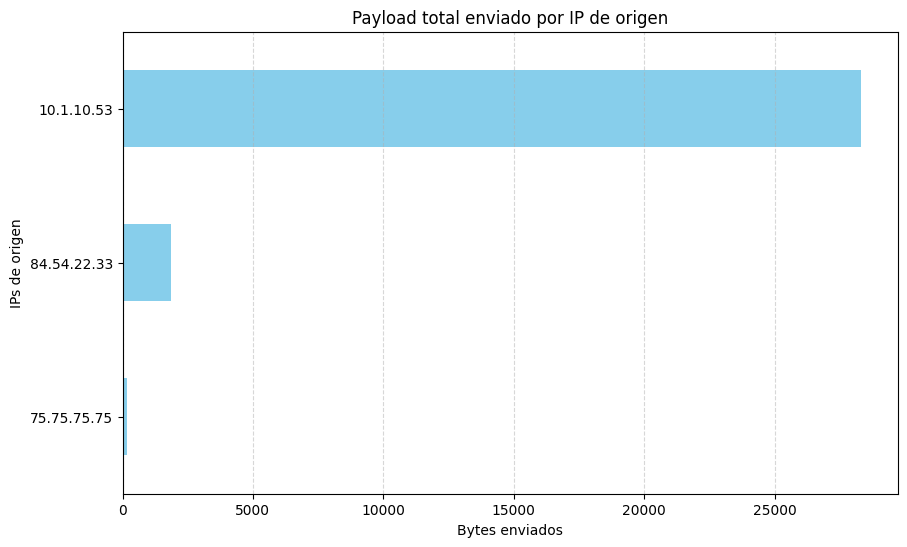

In [17]:
payloads_por_ip_origen = df.groupby("Src Address")["Payload Size"].sum().sort_values()

plt.figure(figsize=(10,6))
payloads_por_ip_origen.plot(kind="barh", color="skyblue")
plt.xlabel("Bytes enviados")
plt.ylabel("IPs de origen")
plt.title("Payload total enviado por IP de origen")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


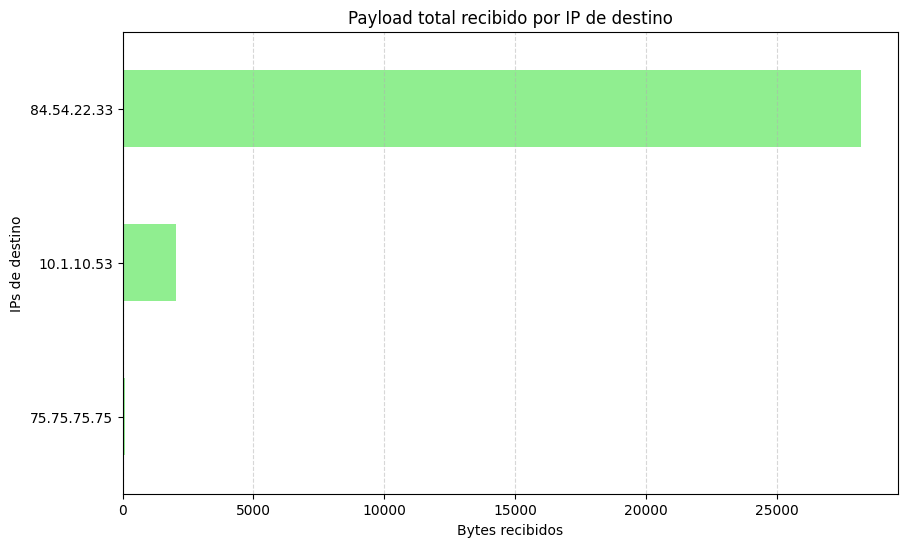

In [18]:
payloads_por_ip_destino = df.groupby("Dst Address")["Payload Size"].sum().sort_values()

plt.figure(figsize=(10,6))
payloads_por_ip_destino.plot(kind="barh", color="lightgreen")
plt.xlabel("Bytes recibidos")
plt.ylabel("IPs de destino")
plt.title("Payload total recibido por IP de destino")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

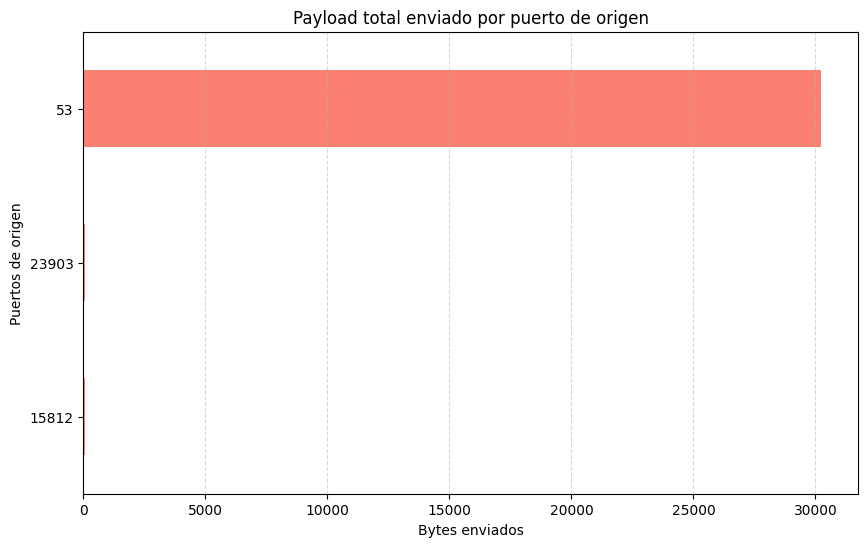

In [19]:
payloads_por_puerto_origen = df.groupby("Src Port")["Payload Size"].sum().dropna().sort_values()

plt.figure(figsize=(10,6))
payloads_por_puerto_origen.plot(kind="barh", color="salmon")
plt.xlabel("Bytes enviados")
plt.ylabel("Puertos de origen")
plt.title("Payload total enviado por puerto de origen")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

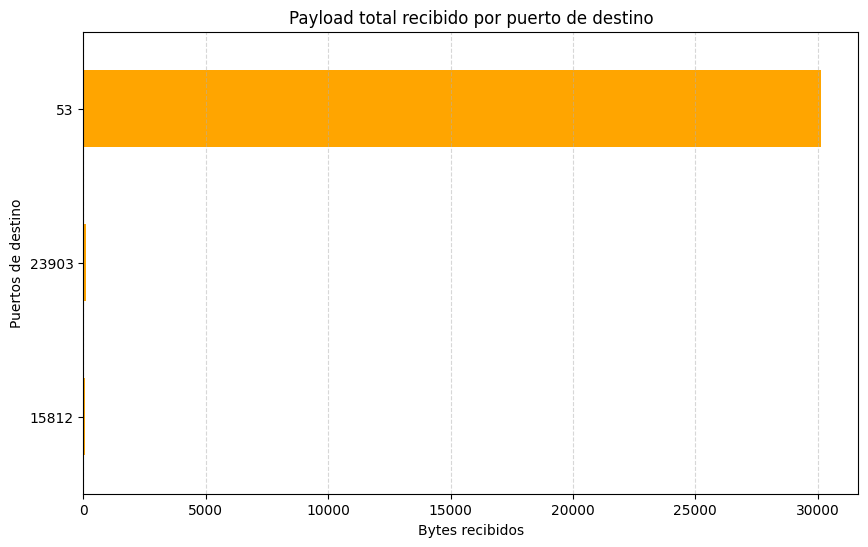

In [20]:
payloads_por_puerto_destino = df.groupby("Dst Port")["Payload Size"].sum().dropna().sort_values()

plt.figure(figsize=(10,6))
payloads_por_puerto_destino.plot(kind="barh", color="orange")
plt.xlabel("Bytes recibidos")
plt.ylabel("Puertos de destino")
plt.title("Payload total recibido por puerto de destino")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


In [21]:
ip_frecuente = df["Src Address"].value_counts().idxmax()

# Extraemos payload y tiempo solo de esta IP
tiempos = []
payloads_ip = []

for pkt in paquetes:
    if pkt.haslayer("IP") and pkt["IP"].src == ip_frecuente:
        tiempos.append(pkt.time)
        payloads_ip.append(len(pkt["IP"].payload))

# Crear un DataFrame con eso
df_tiempo = pd.DataFrame({
    "Tiempo": tiempos,
    "Payload Size": payloads_ip
}).sort_values("Tiempo")

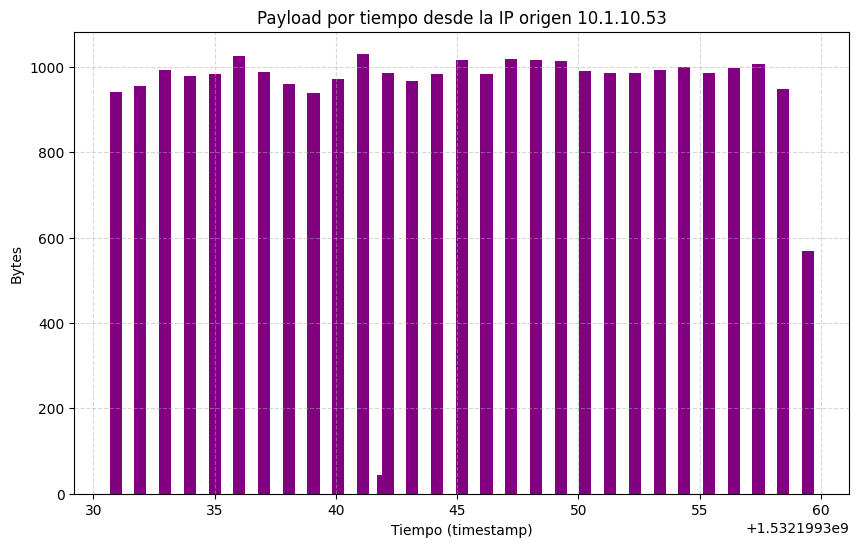

In [22]:
plt.figure(figsize=(10,6))
plt.bar(df_tiempo["Tiempo"], df_tiempo["Payload Size"], width=0.5, color="purple")
plt.ylabel("Bytes")
plt.xlabel("Tiempo (timestamp)")
plt.title(f"Payload por tiempo desde la IP origen {ip_frecuente}")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()